# Data Hackers Survey 2019
![](https://media-exp1.licdn.com/dms/image/C4D1BAQF0uHqQhf92zA/company-background_10000/0?e=2159024400&v=beta&t=wfEZ-Q7WmoRomnUW72nkTMUtZmd0WwMc3xfrKGAOJWA)

## OverView
Data Hackers é uma comunidade de Ciência de Dados, e possui conteúdos excelentes sobre ciência de dados disponibilizados em formato blog, newsletter, podcast e Slack.
Criados pela comunidade, para a própria comunidade brasileira de ciência de dados, machine learning, big data e inteligência artificial. 
Nesse OverView, exploraremos os dados da Pesquisa Data Hackers sobre o mercado de Data Science no Brasil. Os dados foram coletados em uma pesquisa online durante o mês de novembro de 2019.

A pesquisa contou com:
* 1765 respostas
* 35 questões (divididas em 170 colunas)

A seguir vamos explorar um pouco esses dados, e descobrir o que eles nos contam sobre o mercado de dados no Brasil.

In [5]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('datahackers-survey.csv')
df.columns
df['Estado'] = df["('P5', 'living_state')"]
df['Formação'] = df["('P8', 'degreee_level')"]
df['Linguagem de Programação'] = df["('P22', 'most_used_proggraming_languages')"]
df['Trabalho'] = df["('P10', 'job_situation')"]
df['Salário Médio'] = df["('P16', 'salary_range')"].fillna('$ 0/').apply(lambda x: 
                    int( 
                    (int(str(x)[str(x).rfind(' ')+1:str(x).rfind('/')].replace('.','')) 
                    +
                    int(str(x)[str(x).find('$')+2:str(x).find('/')].replace('.','')) 
                    )/2))
df.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')",...,"('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')",Estado,Formação,Linguagem de Programação,Trabalho,Salário Médio
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,...,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras,Minas Gerais (MG),Estudante de Graduação,NaN,Empregado (CTL),1500
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,...,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados,São Paulo (SP),Estudante de Graduação,Python,Empregado (CTL),2500
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,...,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras,São Paulo (SP),Graduação/Bacharelado,Python,Empregado (CTL),5000
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,...,Região Sudeste,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,NaN,Business Intelligence/Analista de BI,São Paulo (SP),Estudante de Graduação,SQL,Estagiário,1500
4,pj9mgud4d6mdct1l7vq0pj9mgu78h6ju,27.0,Masculino,1,NaN,1.0,Graduação/Bacharelado,Freelancer,de 6 a 10,1.0,...,NaN,Computação / Engenharia de Software / Sistemas...,Internet/Ecommerce,"C-level (CDO, CIO, CTO)",NaN,NaN,Graduação/Bacharelado,Python,Freelancer,7000


### Onde estão?

Como em outras áreas de tecnologia do país, a maioria dos profissionais se localizam em São Paulo:

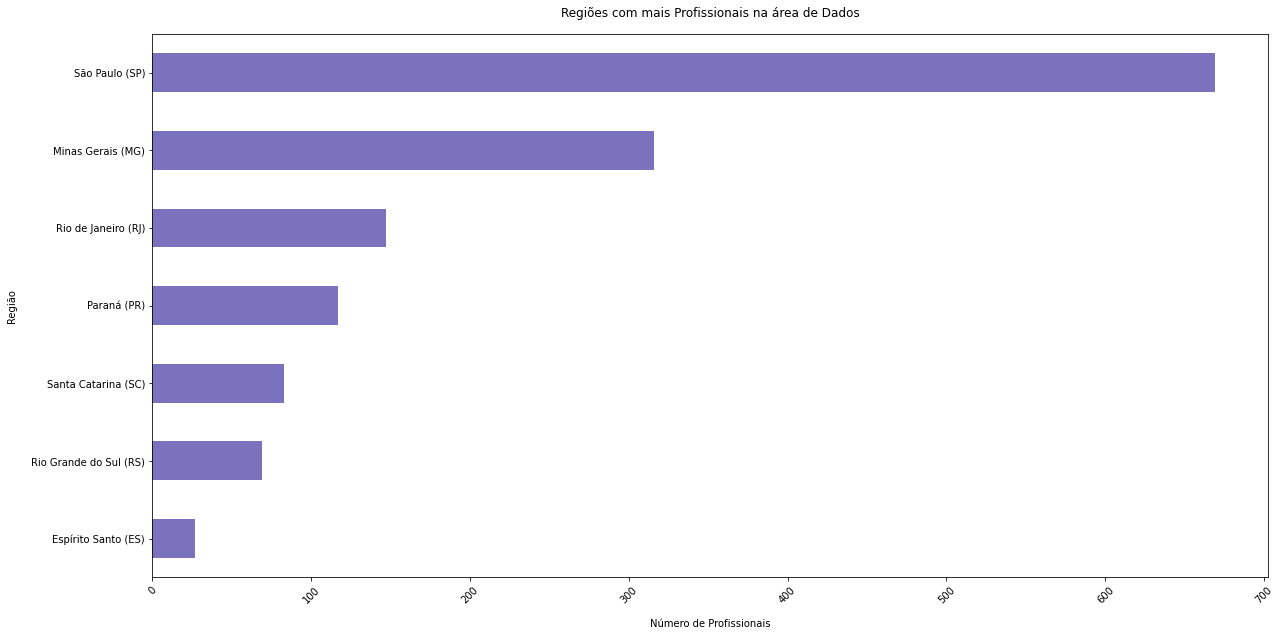

In [2]:
import matplotlib.pyplot as plt
df['Estado'].value_counts().sort_values(ascending=True).plot.barh(color='#7B72BD', figsize=(20, 10))
plt.xlabel("Número de Profissionais", labelpad=14)
plt.xticks(rotation=45)
plt.ylabel("Região", labelpad=14)
plt.title("Regiões com mais Profissionais na área de Dados", y=1.02);

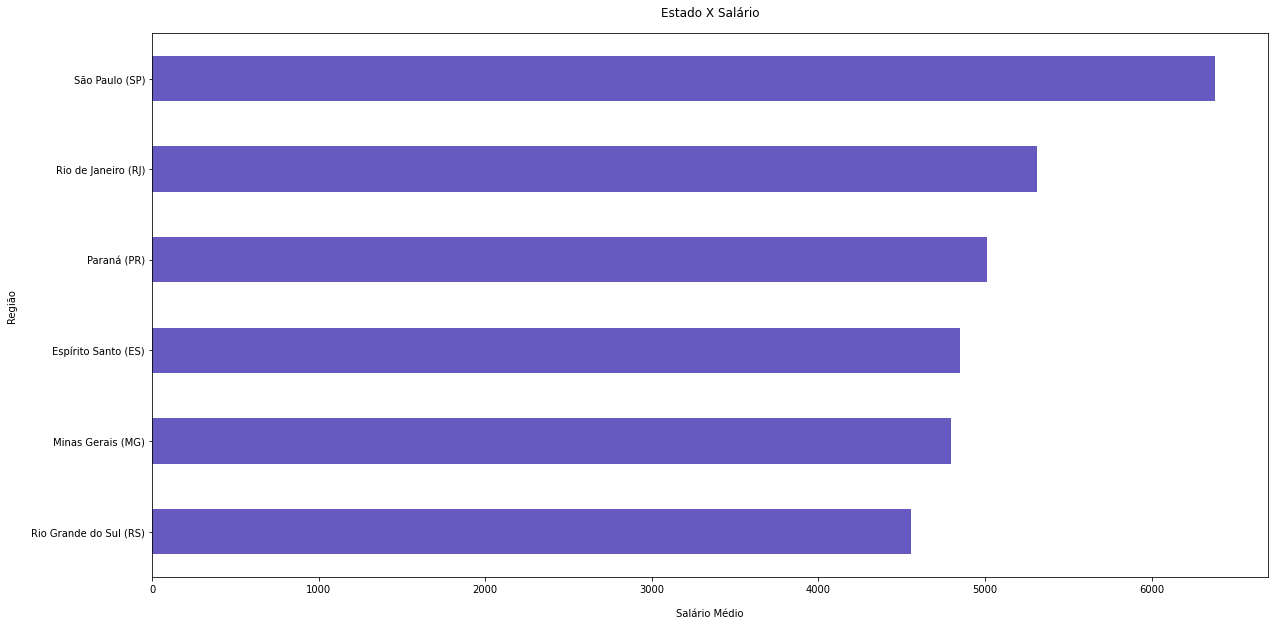

In [15]:
df.groupby('Estado')['Salário Médio'].mean().nlargest(6).sort_values(ascending=True).plot.barh(color='#6659BF', figsize=(20,10))
plt.xlabel("Salário Médio", labelpad=14)
#plt.xticks(rotation=90)
plt.ylabel("Região", labelpad=14)
plt.title("Estado X Salário", y=1.02);

### Formação

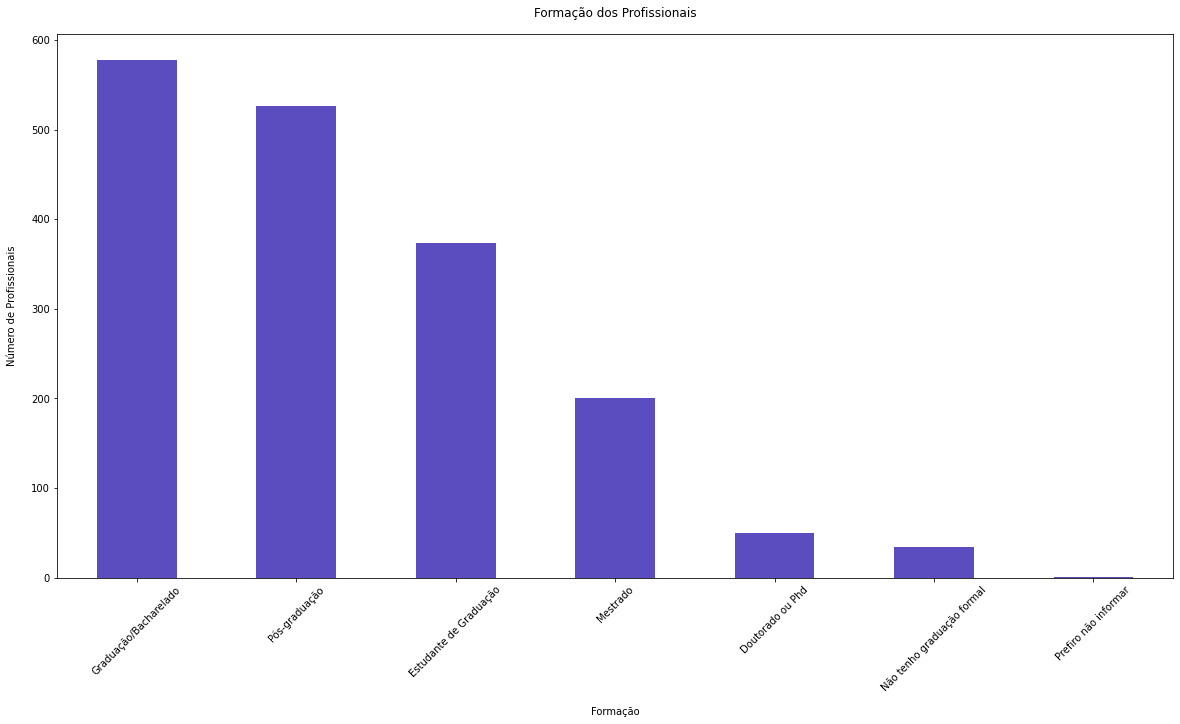

In [16]:
df['Formação'].value_counts().sort_values(ascending=False).plot.bar(color='#5B4DBF', figsize=(20,10))
plt.xlabel("Formação", labelpad=14)
plt.xticks(rotation=45)
plt.ylabel("Número de Profissionais", labelpad=14)
plt.title("Formação dos Profissionais", y=1.02);

### Idade e salário?
O gráfico mostra que existe uma relação bem interessante entre idade e salário. Quando mais experiência você tem, maiores as chances de ter um alto salário.

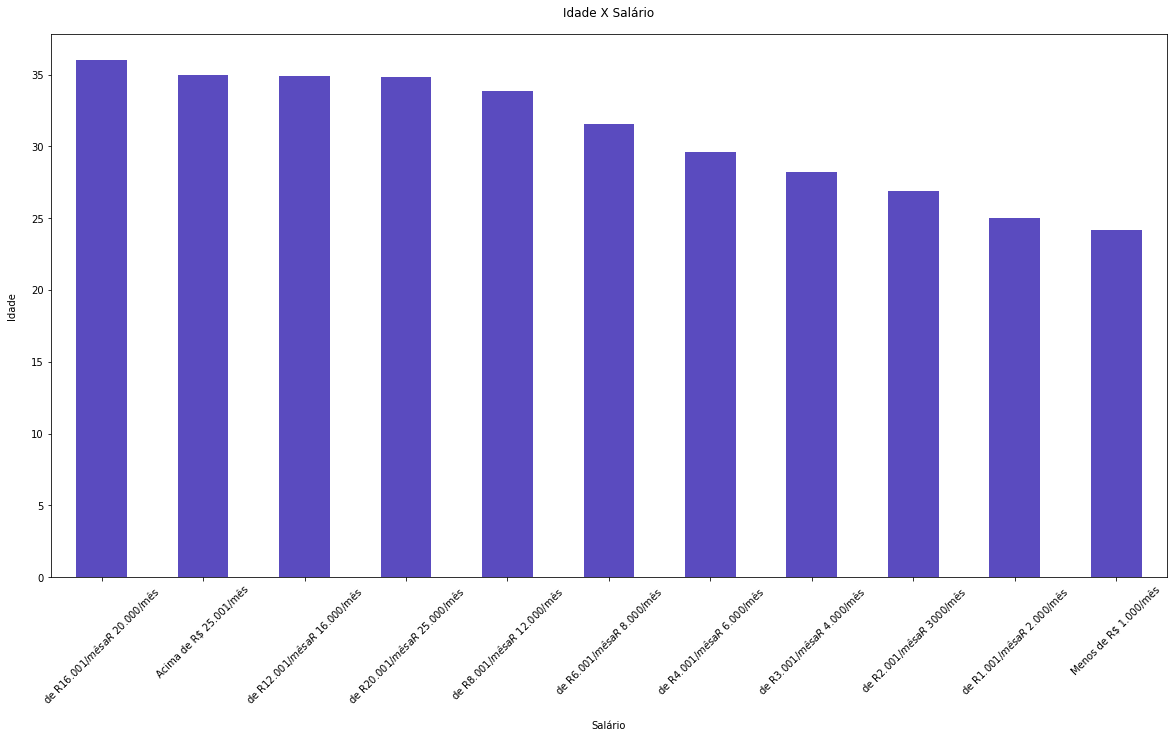

In [6]:
df.groupby("('P16', 'salary_range')")["('P1', 'age')"].mean().sort_values(ascending=False).plot(kind='bar', figsize=(20, 10), color= "#5A4BBF")
plt.xlabel("Salário", labelpad=14)
plt.xticks(rotation=45)
plt.ylabel("Idade", labelpad=14)
plt.title("Idade X Salário", y=1.02);

### E as linguagens?
Python é a queridinha de muitos profissionais, não é surpresa nenhuma ser de longe a linguagem mais usada.                                                                               
Porém, os melhores salários são pagos para profissionais que usam Java e Scala.


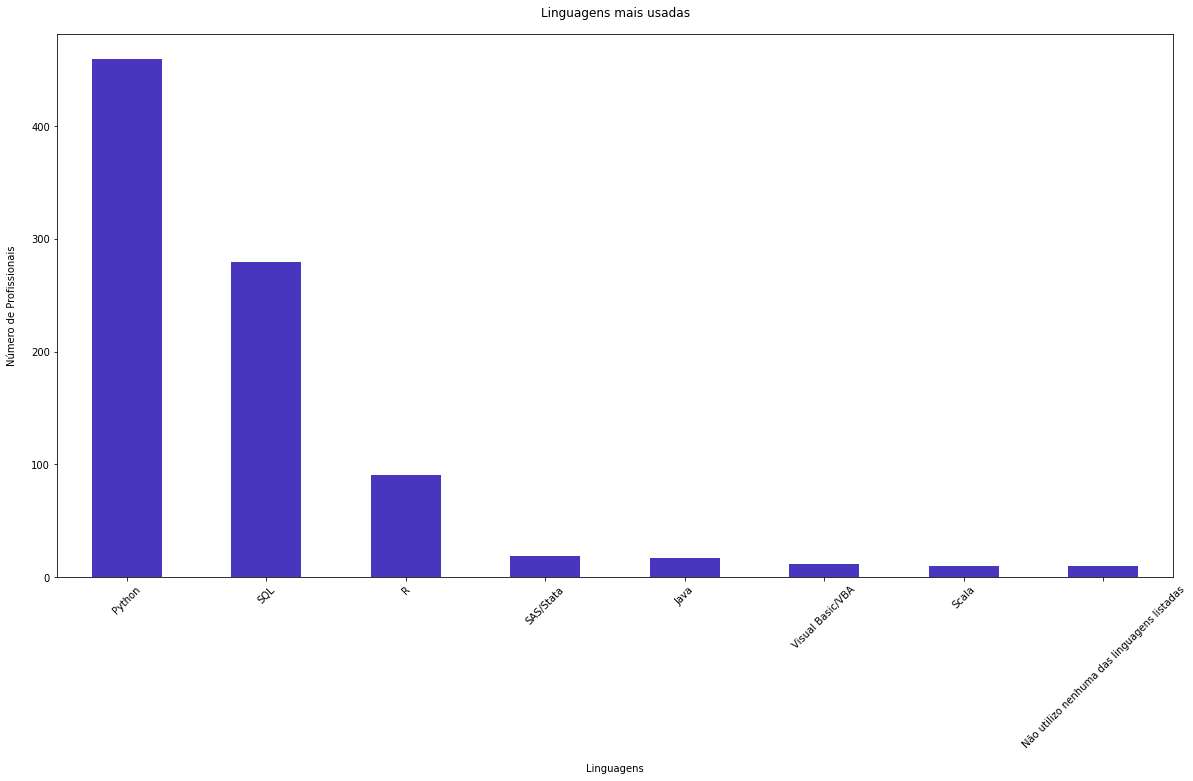

In [7]:
df['Linguagem de Programação'].value_counts().nlargest(8).plot.bar(color='#4836BF', figsize=(20,10))
plt.xlabel("Linguagens", labelpad=14)
plt.xticks(rotation=45)
plt.ylabel("Número de Profissionais", labelpad=14)
plt.title("Linguagens mais usadas", y=1.02);

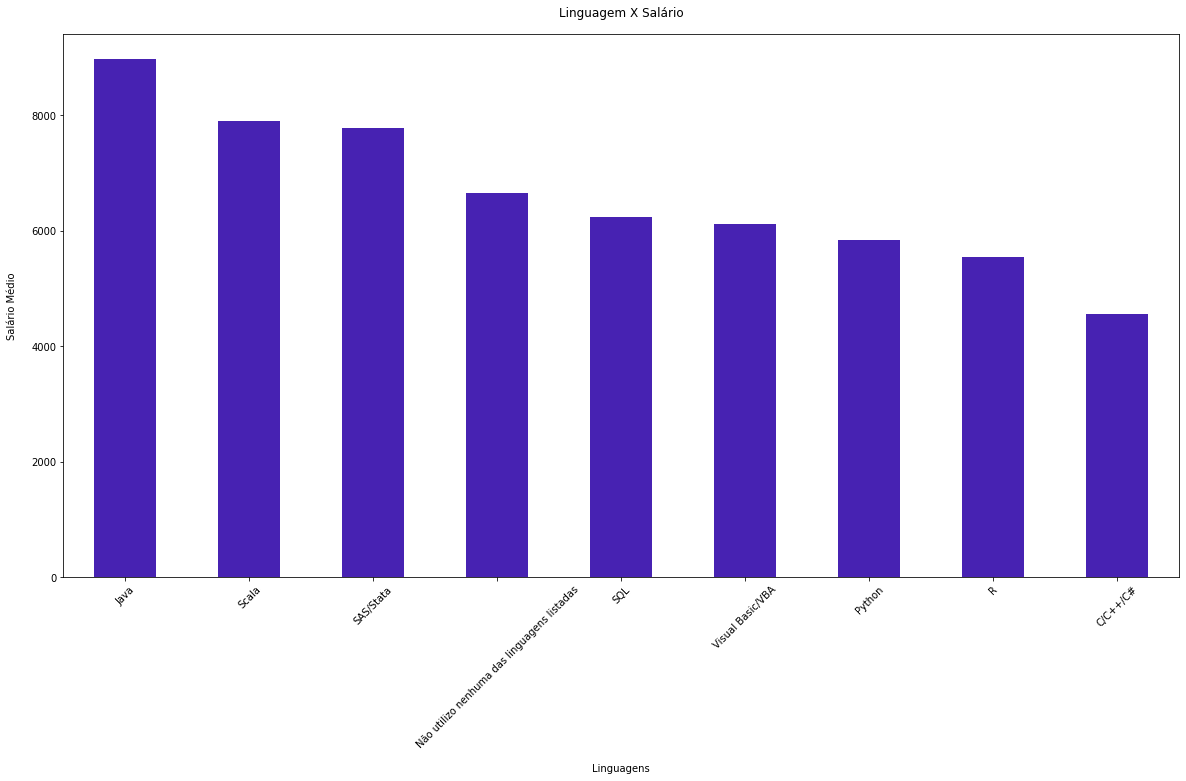

In [8]:
df.groupby('Linguagem de Programação')["Salário Médio"].mean().sort_values(ascending=False).plot(kind= "bar", figsize=(20,10), color='#4722B2')
plt.xlabel("Linguagens", labelpad=14)
plt.xticks(rotation=45)
plt.ylabel("Salário Médio", labelpad=14)
plt.title("Linguagem X Salário", y=1.02);

### Tamanho da empresa impacta no salário?

Text(0.5, 1.02, 'Tamanho da Empresa X Salário')

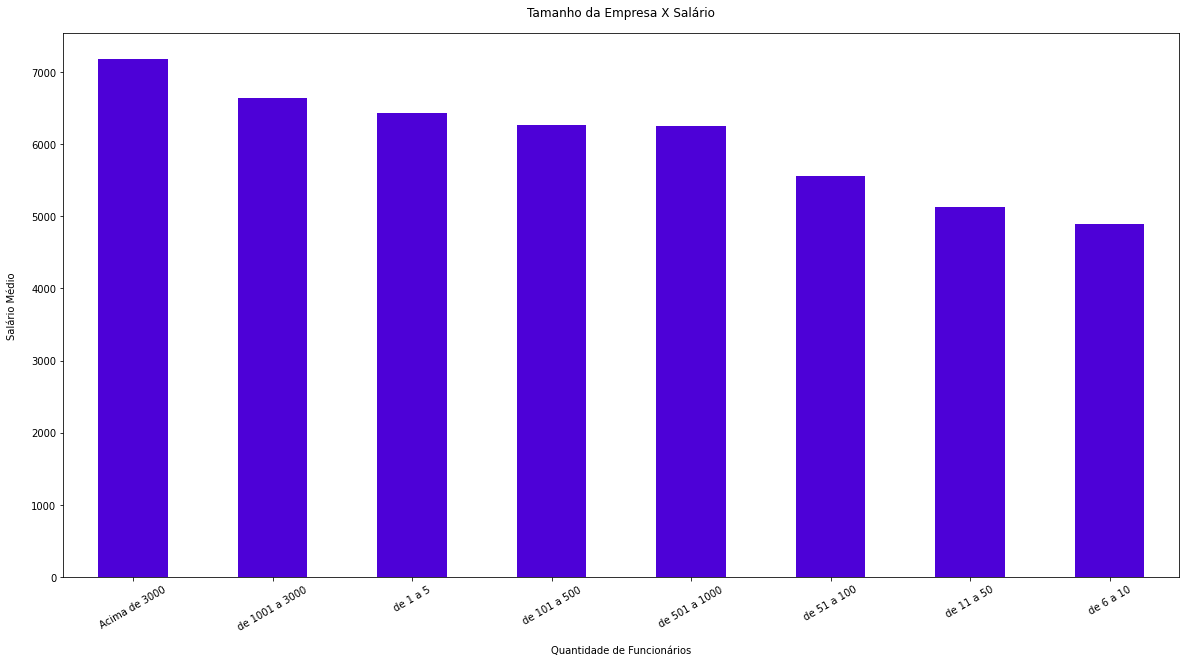

In [9]:
df.groupby("('P12', 'workers_number')")['Salário Médio'].mean().nlargest(8).sort_values(ascending=True).sort_values(ascending=False).plot.bar(color='#4D01D7', figsize=(20,10))
plt.xlabel("Quantidade de Funcionários", labelpad=14)
plt.xticks(rotation=30)
plt.ylabel("Salário Médio", labelpad=14)
plt.title('Tamanho da Empresa X Salário', y=1.02)

### E a área de atuação?

Text(0.5, 1.02, 'Área de Atuação X Salário')

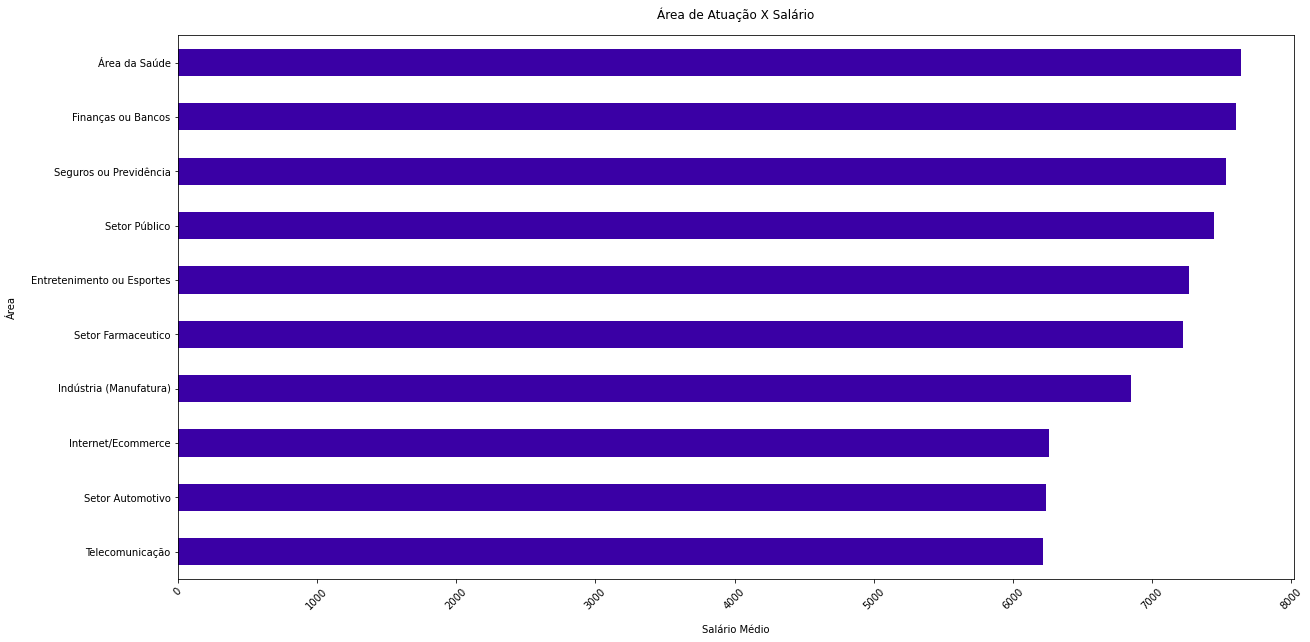

In [10]:
df.groupby("('D4', 'anonymized_market_sector')")['Salário Médio'].mean().nlargest(10).sort_values(ascending=True).plot.barh(color='#3A00A5', figsize=(20,10))
plt.xlabel("Salário Médio", labelpad=14)
plt.xticks(rotation=45)
plt.ylabel("Área", labelpad=14)
plt.title('Área de Atuação X Salário', y=1.02)

### Conclusão

Entre outras coisas a pesquisa nos mostra os pontos de concentração daqueles que trabalham com tecnologia - São Paulo (47%) e Minas Gerais (22%), a formação dos participantes - 59% dos pesquisados fizeram uma graduação. Em adição podemos encontrar informações sobre salário que podem mostrar a realidade da profissão, as áreas de saúde e financeira são as que pagam melho - A média do Brasil é de 5436 RS, podendo aumentar 60% caso tenha mais de 10 anos de experiência...em São Paulo fica em 6379 RS.